<a href="https://colab.research.google.com/github/Hydrateacher/animal_classification2/blob/main/animal_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import fastai
import torch
fastai.__version__

'2.7.12'

In [3]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [4]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [5]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated (h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default) or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

options:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    dataset
    f

In [6]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes  Man Woman Girl Boy --type_csv train --limit 500


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Man.

Man
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 378077 online images for train.
    [INFO] | Limiting to 500 images.
    [INFO] | Download of 490 images in train.
100% 4

In [7]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')
path.ls()
fls = get_image_files(path)
fls

(#12724) [Path('train/Girl/7ae242681c96d11c.jpg'),Path('train/Girl/8dacb688082815dc.jpg'),Path('train/Girl/ba0b5c1a13f777f8.jpg'),Path('train/Girl/fe9b28bdb53d468b.jpg'),Path('train/Girl/d68b8557cba3b83c.jpg'),Path('train/Girl/06215984ae0ed3aa.jpg'),Path('train/Girl/0fa3882ba961c9a8.jpg'),Path('train/Girl/d6d1fa2576b08352.jpg'),Path('train/Girl/106bb0f35e3e3c32.jpg'),Path('train/Girl/b938b57608b40241.jpg')...]

In [8]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

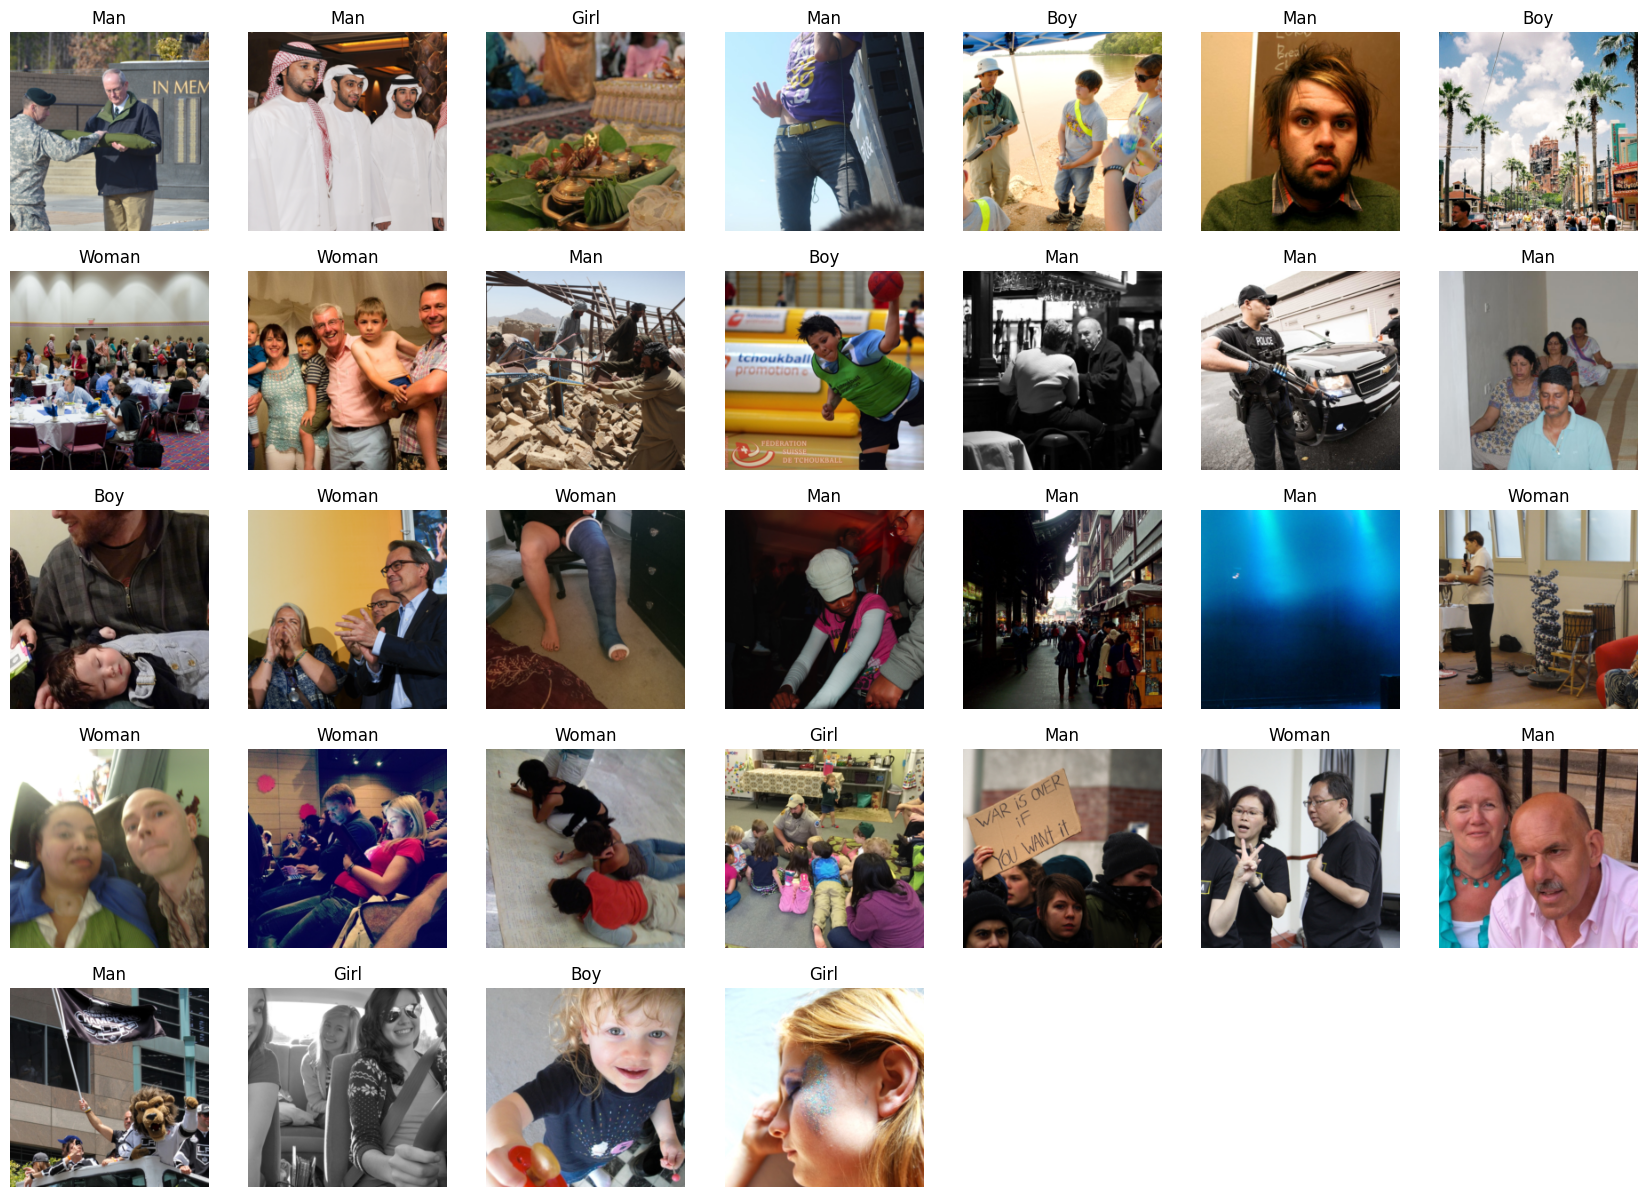

In [9]:
#Datablock
transpotrs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader
dls = transpotrs.dataloaders(path)

#datasetni tekshirish
dls.train.show_batch(max_n=32)

In [1]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

NameError: ignored